In [51]:
pip install requests pandas matplotlib beautifulsoup4


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)


In [53]:
def fetch_remoteok():
    url = "https://remoteok.com/api"
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            data = response.json()
            jobs_data = data[1:] if len(data) > 1 else []
            return pd.DataFrame(jobs_data)
    except:
        pass
    return pd.DataFrame()

def fetch_arbeitnow():
    url = "https://arbeitnow.com/api/job-board-api"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json().get("data", [])
            return pd.DataFrame(data)
    except:
        pass
    return pd.DataFrame()

# Try RemoteOK first
df = fetch_remoteok()

# If remote is empty move to Arbeitnow
if df.empty:
    print("⚠️ RemoteOK returned no data — using Arbeitnow as backup.")
    df = fetch_arbeitnow()

print(f"✅ Retrieved {len(df)} job listings.")
print("Available columns:", df.columns.tolist())
df.head()


✅ Retrieved 95 job listings.
Available columns: ['slug', 'id', 'epoch', 'date', 'company', 'company_logo', 'position', 'tags', 'logo', 'description', 'location', 'salary_min', 'salary_max', 'apply_url', 'url', 'original', 'verified']


,slug,id,epoch,date,company,company_logo,position,tags,logo,description,location,salary_min,salary_max,apply_url,url,original,verified
0,remote-senior-devops-engineer-echo-base-1093825,1093825,1755248403,2025-08-15T09:00:03+00:00,Echo Base,https://remoteok.com/assets/img/jobs/75c329087...,Senior DevOps Engineer,"[web3, crypto, cryptocurrency, system, swift, ...",https://remoteok.com/assets/img/jobs/75c329087...,<p>Echo Base Global is a digital finance compa...,,60000,150000,https://remoteOK.com/remote-jobs/remote-senior...,https://remoteOK.com/remote-jobs/remote-senior...,NaN,NaN
1,remote-bd-manager-powered-by-pioneer-1093808,1093808,1755162003,2025-08-14T09:00:03+00:00,Powered by Pioneer,,BD Manager,"[manager, defi, crypto, engineering]",,"<p><span style=""font-size: medium;"">APX is the...",,45000,90000,https://remoteOK.com/remote-jobs/remote-bd-man...,https://remoteOK.com/remote-jobs/remote-bd-man...,NaN,NaN
2,remote-senior-elixir-engineer-sanctuary-comput...,1093807,1755102755,2025-08-13T16:32:35+00:00,Sanctuary Computer,https://remoteOK.com/assets/img/jobs/7287a4540...,Senior Elixir Engineer,"[exec, dev, backend, full stack, saas, senior,...",https://remoteOK.com/assets/img/jobs/7287a4540...,<p><strong>Original job post link:</strong></p...,,150000,220000,https://remoteOK.com/remote-jobs/remote-senior...,https://remoteOK.com/remote-jobs/remote-senior...,True,NaN
3,remote-data-analyst-p2p-org-1093806,1093806,1755097202,2025-08-13T15:00:02+00:00,P2P. org,https://remoteok.com/assets/img/jobs/120086150...,Data Analyst,"[analyst, defi, crypto, system, consultancy, t...",https://remoteok.com/assets/img/jobs/120086150...,"<p style=""min-height:1.5em""><a target=""_blank""...",Delhi,55000,90000,https://remoteOK.com/remote-jobs/remote-data-a...,https://remoteOK.com/remote-jobs/remote-data-a...,NaN,NaN
4,remote-senior-staff-security-engineer-ethena-l...,1093805,1755093603,2025-08-13T14:00:03+00:00,Ethena Labs,https://remoteok.com/assets/img/jobs/ea9df5758...,Senior Staff Security Engineer,"[security, defi, crypto, ethereum, full-stack,...",https://remoteok.com/assets/img/jobs/ea9df5758...,"<p><b style=""font-size: 18px"">Who We Are:</b><...",Globally Remote,60000,130000,https://remoteOK.com/remote-jobs/remote-senior...,https://remoteOK.com/remote-jobs/remote-senior...,NaN,NaN


In [54]:
if "tags" in df.columns:  # RemoteOK01
    df = df[["date", "company", "position", "location", "tags", "salary_min", "salary_max", "apply_url"]]
    df.columns = ["Date Posted", "Company", "Job Title", "Location", "Skills", "Min Salary", "Max Salary", "Apply Link"]

elif "tags" not in df.columns and "company_name" in df.columns:  # Arbeitnow02
    df = df[["date_posted", "company_name", "title", "location", "tags", "remote", "url"]]
    df.columns = ["Date Posted", "Company", "Job Title", "Location", "Skills", "Remote", "Apply Link"]

print(f"✅ Cleaned dataset with {len(df)} rows.")
df.head()


✅ Cleaned dataset with 95 rows.


,Date Posted,Company,Job Title,Location,Skills,Min Salary,Max Salary,Apply Link
0,2025-08-15T09:00:03+00:00,Echo Base,Senior DevOps Engineer,,"[web3, crypto, cryptocurrency, system, swift, ...",60000,150000,https://remoteOK.com/remote-jobs/remote-senior...
1,2025-08-14T09:00:03+00:00,Powered by Pioneer,BD Manager,,"[manager, defi, crypto, engineering]",45000,90000,https://remoteOK.com/remote-jobs/remote-bd-man...
2,2025-08-13T16:32:35+00:00,Sanctuary Computer,Senior Elixir Engineer,,"[exec, dev, backend, full stack, saas, senior,...",150000,220000,https://remoteOK.com/remote-jobs/remote-senior...
3,2025-08-13T15:00:02+00:00,P2P. org,Data Analyst,Delhi,"[analyst, defi, crypto, system, consultancy, t...",55000,90000,https://remoteOK.com/remote-jobs/remote-data-a...
4,2025-08-13T14:00:03+00:00,Ethena Labs,Senior Staff Security Engineer,Globally Remote,"[security, defi, crypto, ethereum, full-stack,...",60000,130000,https://remoteOK.com/remote-jobs/remote-senior...


In [55]:
df.dropna(subset=["Job Title", "Company"], inplace=True)

df["Skills"] = df["Skills"].apply(lambda x: x if isinstance(x, list) else [])

df["Date Posted"] = pd.to_datetime(df["Date Posted"], errors="coerce")

print("✅ Cleaned & standardized data.")
df.head()


✅ Cleaned & standardized data.


,Date Posted,Company,Job Title,Location,Skills,Min Salary,Max Salary,Apply Link
0,2025-08-15 09:00:03+00:00,Echo Base,Senior DevOps Engineer,,"[web3, crypto, cryptocurrency, system, swift, ...",60000,150000,https://remoteOK.com/remote-jobs/remote-senior...
1,2025-08-14 09:00:03+00:00,Powered by Pioneer,BD Manager,,"[manager, defi, crypto, engineering]",45000,90000,https://remoteOK.com/remote-jobs/remote-bd-man...
2,2025-08-13 16:32:35+00:00,Sanctuary Computer,Senior Elixir Engineer,,"[exec, dev, backend, full stack, saas, senior,...",150000,220000,https://remoteOK.com/remote-jobs/remote-senior...
3,2025-08-13 15:00:02+00:00,P2P. org,Data Analyst,Delhi,"[analyst, defi, crypto, system, consultancy, t...",55000,90000,https://remoteOK.com/remote-jobs/remote-data-a...
4,2025-08-13 14:00:03+00:00,Ethena Labs,Senior Staff Security Engineer,Globally Remote,"[security, defi, crypto, ethereum, full-stack,...",60000,130000,https://remoteOK.com/remote-jobs/remote-senior...


In [56]:
from collections import Counter

all_skills = [skill for sublist in df["Skills"] for skill in sublist]

skill_counts = Counter(all_skills)

skills_df = pd.DataFrame(skill_counts.items(), columns=["Skill", "Count"])
skills_df = skills_df.sort_values(by="Count", ascending=False).head(10)

print("Top 10 Skills:")
print(skills_df)


Top 10 Skills:
            Skill  Count
35        support     41
16       engineer     29
44     management     28
6       technical     27
36         growth     27
13         senior     26
43      financial     26
20    engineering     23
41       software     22
61  digital nomad     20


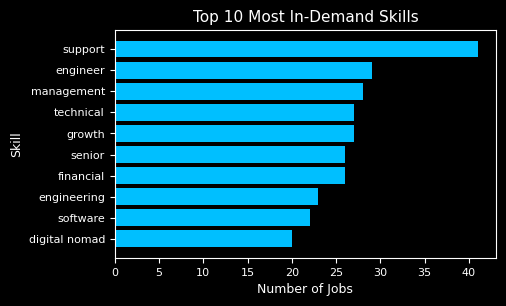

In [57]:
plt.figure(figsize=(5, 3)) 
plt.style.use("dark_background")

plt.barh(
    skills_df["Skill"],
    skills_df["Count"],
    color="#00bfff"
)
plt.xlabel("Number of Jobs", color="white", fontsize=9)
plt.ylabel("Skill", color="white", fontsize=9)
plt.title("Top 10 Most In-Demand Skills", color="white", fontsize=11)
plt.gca().invert_yaxis()

plt.xticks(color="white", fontsize=8)
plt.yticks(color="white", fontsize=8)

plt.tight_layout(pad=0.5) 
plt.show()


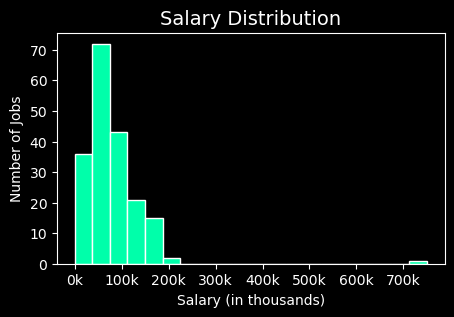

In [58]:
import matplotlib.ticker as mticker

salary_cols = [col for col in df.columns if "Salary" in col]

if salary_cols:
    numeric_salaries = []
    for col in salary_cols:
        try:
            numeric_salaries.extend(pd.to_numeric(df[col], errors="coerce").dropna().tolist())
        except:
            pass

    if numeric_salaries:
        numeric_salaries = [s / 1000 for s in numeric_salaries]

        plt.figure(figsize=(5, 3))
        plt.style.use("dark_background")
        plt.hist(numeric_salaries, bins=20, color="#00FFAA", edgecolor="white")
        plt.xlabel("Salary (in thousands)", color="white")
        plt.ylabel("Number of Jobs", color="white")
        plt.title("Salary Distribution", color="white", fontsize=14)
        plt.tick_params(colors="white")

        # Format x-axis ticks as '40k', '50k', etc.
        plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x)}k"))

        plt.show()
    else:
        print("⚠️ No numeric salary data available for plotting.")
else:
    print("⚠️ No salary columns found in dataset.")
